In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_decision_regions

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [4]:
from sklearn.datasets import make_circles
from matplotlib.colors import ListedColormap

In [5]:
x,y =make_circles(n_samples=100,noise=0.1,random_state=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

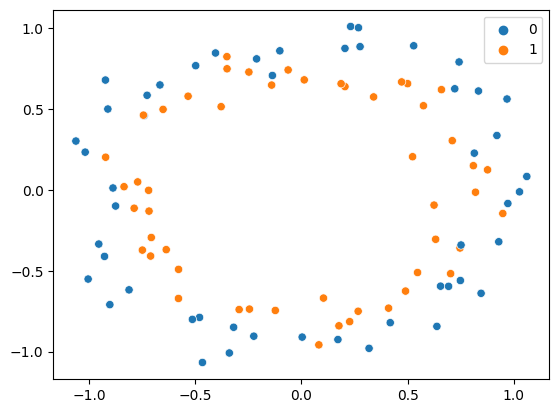

In [8]:

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.show()

In [24]:

model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               768       
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5000)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 21ms/step - loss: 0.2057 - accuracy: 0.9125 - val_loss: 0.4222 - val_accuracy: 0.8500
Epoch 2502/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.2058 - accuracy: 0.9125 - val_loss: 0.4360 - val_accuracy: 0.8500
Epoch 2503/5000
3/3 [==============================] - 0s 22ms/step - loss: 0.2041 - accuracy: 0.9250 - val_loss: 0.4469 - val_accuracy: 0.8500
Epoch 2504/5000
3/3 [==============================] - 0s 33ms/step - loss: 0.2041 - accuracy: 0.9250 - val_loss: 0.4548 - val_accuracy: 0.8500
Epoch 2505/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.2044 - accuracy: 0.9250 - val_loss: 0.4573 - val_accuracy: 0.8500
Epoch 2506/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.2040 - accuracy: 0.9375 - val_loss: 0.4622 - val_accuracy: 0.8500
Epoch 2507/5000
3/3 [==============================] - 0s 24ms/step - loss: 0.2039 - accuracy: 0.9375

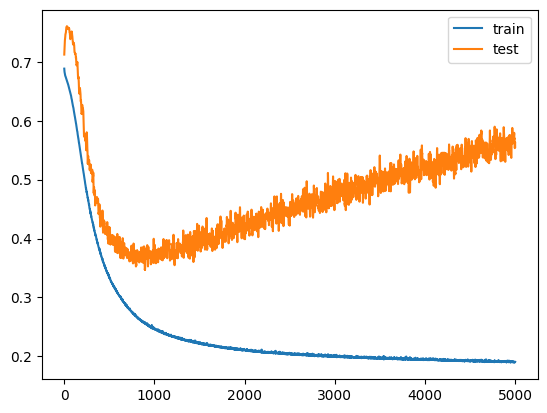

In [28]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

# **Early stopping technique**

In [29]:
model1 = Sequential()
model1.add(Dense(256, input_dim=2, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               768       
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
# Parameter
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=50,
    verbose=0, mode='auto',
    baseline=None,
    restore_best_weights=False,
    )
# Verbose = 1 means we can see the output as how many times ephochs

In [33]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5000, callbacks=callback)

Epoch 1/5000
3/3 [==============================] - 0s 53ms/step - loss: 0.1905 - accuracy: 0.9375 - val_loss: 0.5518 - val_accuracy: 0.8500
Epoch 2/5000
3/3 [==============================] - 0s 30ms/step - loss: 0.1905 - accuracy: 0.9250 - val_loss: 0.5497 - val_accuracy: 0.8500
Epoch 3/5000
3/3 [==============================] - 0s 21ms/step - loss: 0.1910 - accuracy: 0.9250 - val_loss: 0.5423 - val_accuracy: 0.8500
Epoch 4/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.1909 - accuracy: 0.9250 - val_loss: 0.5469 - val_accuracy: 0.8500
Epoch 5/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.1902 - accuracy: 0.9250 - val_loss: 0.5509 - val_accuracy: 0.8500
Epoch 6/5000
3/3 [==============================] - 0s 23ms/step - loss: 0.1897 - accuracy: 0.9250 - val_loss: 0.5506 - val_accuracy: 0.8500
Epoch 7/5000
3/3 [==============================] - 0s 29ms/step - loss: 0.1898 - accuracy: 0.9125 - val_loss: 0.5525 - val_accuracy: 0.8500
Epoch 8/5000


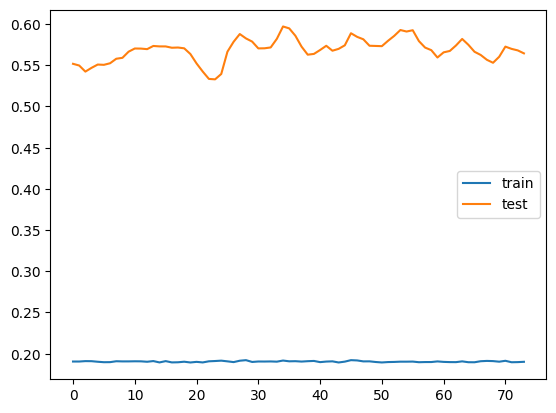

In [34]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 15s 2ms/step


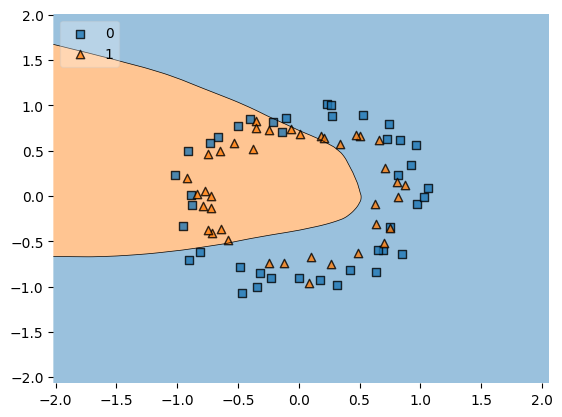

In [35]:

plot_decision_regions(x_train, y_train.ravel(), clf = model1, legend=2)
plt.show()

9600/9600 [==============================] - 15s 2ms/step


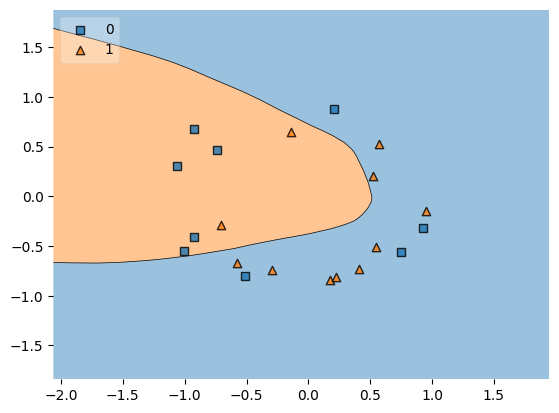

In [36]:

plot_decision_regions(x_test, y_test.ravel(), clf = model1, legend=2)
plt.show()